In [1]:
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram
from qiskit import *

from SYMQCircuit import *

# My own statevector impl:

[-0.0821031 -0.48804882j  0.0821031 -0.48804882j -0.07019946+0.01180946j
 -0.07019946-0.01180946j  0.0821031 +0.48804882j -0.0821031 +0.48804882j
  0.07019946-0.01180946j  0.07019946+0.01180946j]


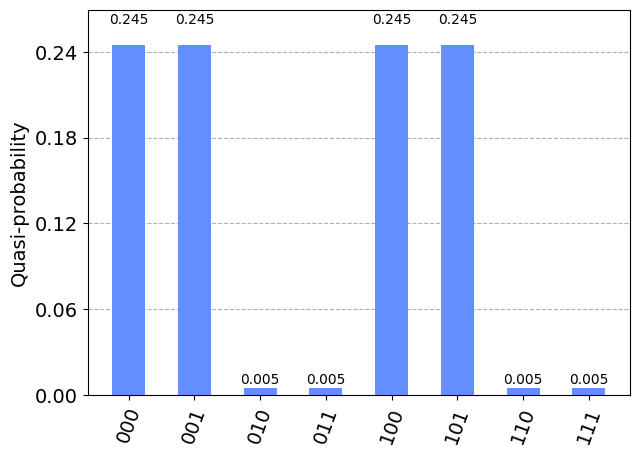

In [2]:
nr_qubits = 3

circuit = SYMQCircuit(nr_qubits=nr_qubits)
circuit.add_h(0)
circuit.add_h(2)
circuit.add_rx(1,2/7)
circuit.add_rz(0,1/3)
circuit.add_y(2)
psi_final = circuit.get_state_vector()
print(psi_final)
probabilities = circuit.get_state_probabilities()

plot_histogram(probabilities)

# Using qiskit:

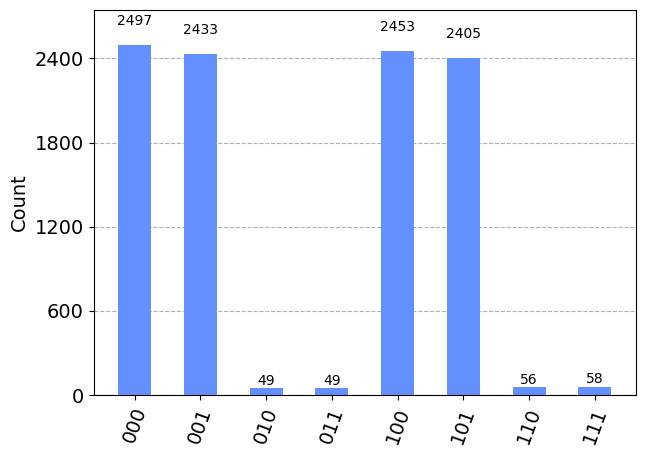

In [3]:
# Create a Quantum Circuit acting on a quantum register of three qubits
circ = QuantumCircuit(nr_qubits)
circ.h(0)
circ.h(2)
circ.rx(2/7, 1)
circ.rz(1/3, 0)
circ.y(2)

meas = QuantumCircuit(nr_qubits,nr_qubits)
meas.barrier(range(nr_qubits))
meas.measure(range(nr_qubits), range(nr_qubits))
circ.add_register(meas.cregs[0])
qc = circ.compose(meas)
backend_sim = Aer.get_backend('statevector_simulator')
job_sim = backend_sim.run(transpile(qc, backend_sim), shots=10000)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc)
reversed_states = {}
for key in list(counts.keys()):
    reversed_states[key[::-1]] = counts[key]
plot_histogram(reversed_states)